# Markov Clustering

Kroki algorytmu:
- normalizacja kolumn macierzy
- symulacja chodzenia po grafie przez podniesienie macierzy do potęgi e(parametr)
- uwydatnienie najlepszych wyników przez podniesienie wartości macierzy do potęgi r (parametr)
- normalizacja kolumn macierzy 
- powatarzamy kroki 2 - 4 T'razy albo do osiągniecia pełnego podziału na klastry
- klastry: nie zerwowe wartości w wierszach

# Implementacja

In [62]:
import numpy as np
import time

In [67]:
class MCL():
  
  def __init__(self, M, e, r):
    self.M = np.array(M,dtype=np.float64)
    self.e = e
    self.r = r
    self.add_loops()

  def add_loops(self):
    
    for i in range(self.M.shape[0]):
      self.M[i][i] = 1

  def normalize(self):
    #print("normalize")
    sum = self.M.sum(axis=0)
    for (x,y),_ in np.ndenumerate(self.M):
      if sum[y] != 0:
        self.M[x][y] /= float(sum[y])
    #print(self.M)

  def random_walk(self):
    matrix = self.M
    #print("random walk")
    #print(matrix)
    for i in range(self.e):
      matrix = matrix.dot(self.M)
      #print(matrix)
    self.M = matrix

  def raise_elements(self):
    self.M **= self.r
    self.normalize()

  def is_done(self, matrix):
    for (x,y),_ in np.ndenumerate(self.M):
      if self.M[x][y]- matrix[x][y] != 0:
        return False
    return True

  def get_clusters(self):
    clusters = []
    for i in range(self.M.shape[0]):
      cl = []
      for j in range(self.M.shape[1]):
        if self.M[i][j] > 0:
          cl.append(j)
      
      if len(cl) > 0:
        clusters.append(cl)
    return clusters
        

  def compute(self, T=120):
    start = time.time()
    self.normalize()

    t=0
    while(t < T):
      #print(t)
      matrix = np.copy(self.M)
      self.random_walk()
      self.raise_elements()
      if self.is_done(matrix):
        t = T
      t += 1
    end = time.time()
    print(end - start, " sek")
    return self.get_clusters()
    



# Testy

In [30]:
import networkx as nx
from networkx import Graph
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import random
import math
import pandas as pd
import numpy as np

In [82]:
colors = {
    0 : 'blue',
    1: 'red',
    2: 'green',
    3: 'yellow',
    4: 'pink',
    5: 'brown',
    6: 'orange',
    7: 'black',
    8: 'white'
}

def show(G, clusters=None, labels=False):
    plt.figure(figsize=(15, 15))
    pos = nx.spring_layout(G, iterations=100)
    options = {
    "edge_color": "#A0CBE2",
    } 
    if clusters is None:
      nx.draw(G, pos,with_labels=labels, **options)
    else:
      color_map = []
      for i in range(G.number_of_nodes()):
        for j in range(len(clusters)):
          if i in clusters[j]:
            color_map.append(colors[j])

      nx.draw(G, pos, node_color=color_map,with_labels=labels, **options)

    plt.show()

def gen_graph(p_matrix):
  G = nx.Graph()
  G.add_nodes_from(range(40))

  nodes = list(G.nodes)

  for i in range(len(nodes)):
    for j in range(i+1, len(nodes)):
      n1 = nodes[i]
      n2 = nodes[j]

      g1 = int(i/10)
      g2 = int(j/10)
      p = p_matrix[g1][g2]
      
      if p > random.random():
        G.add_edge(n1, n2)

  show(G)
  return G



### Prosty test

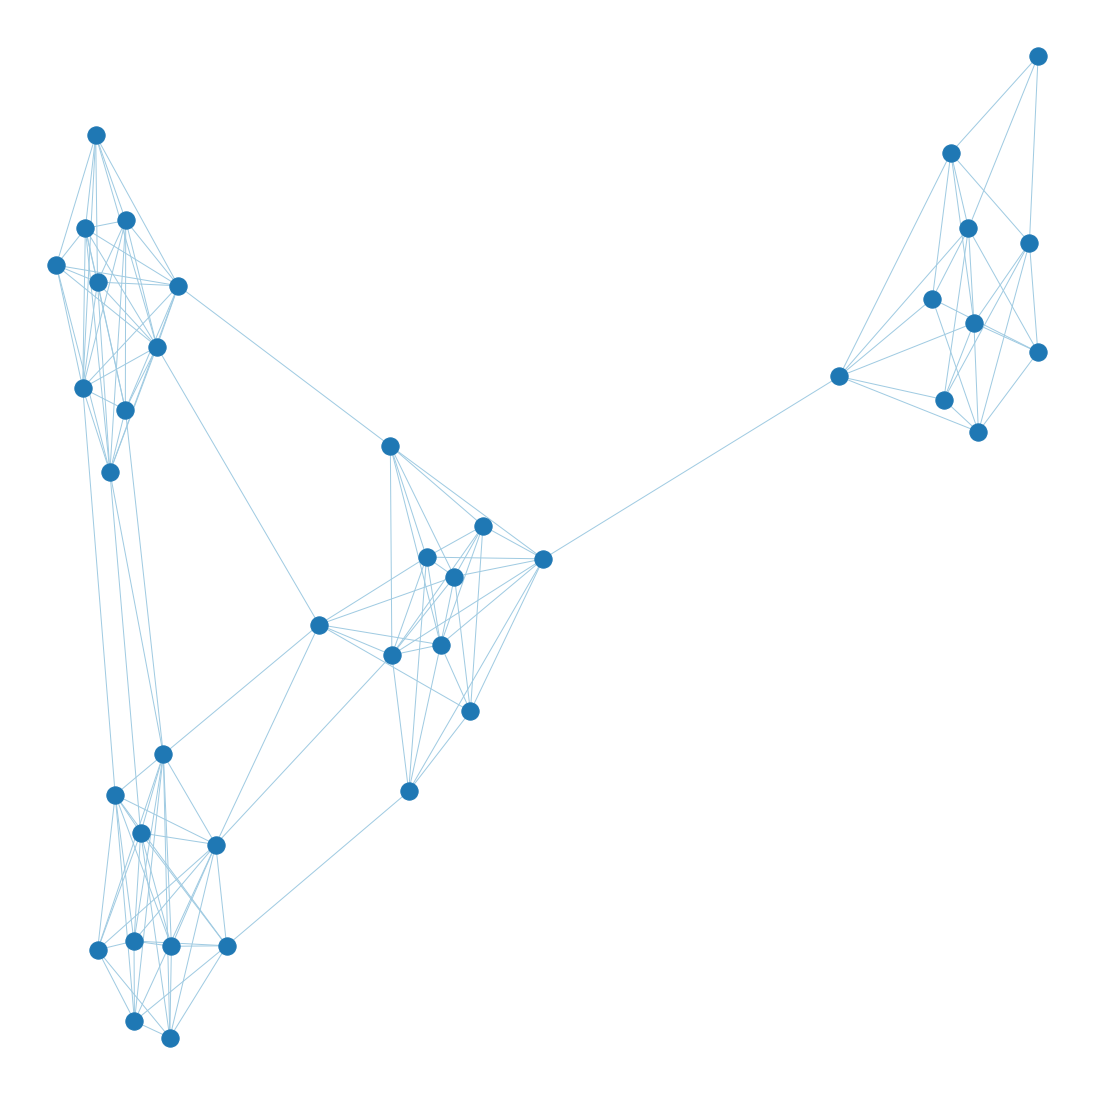

0.0708012580871582  sek


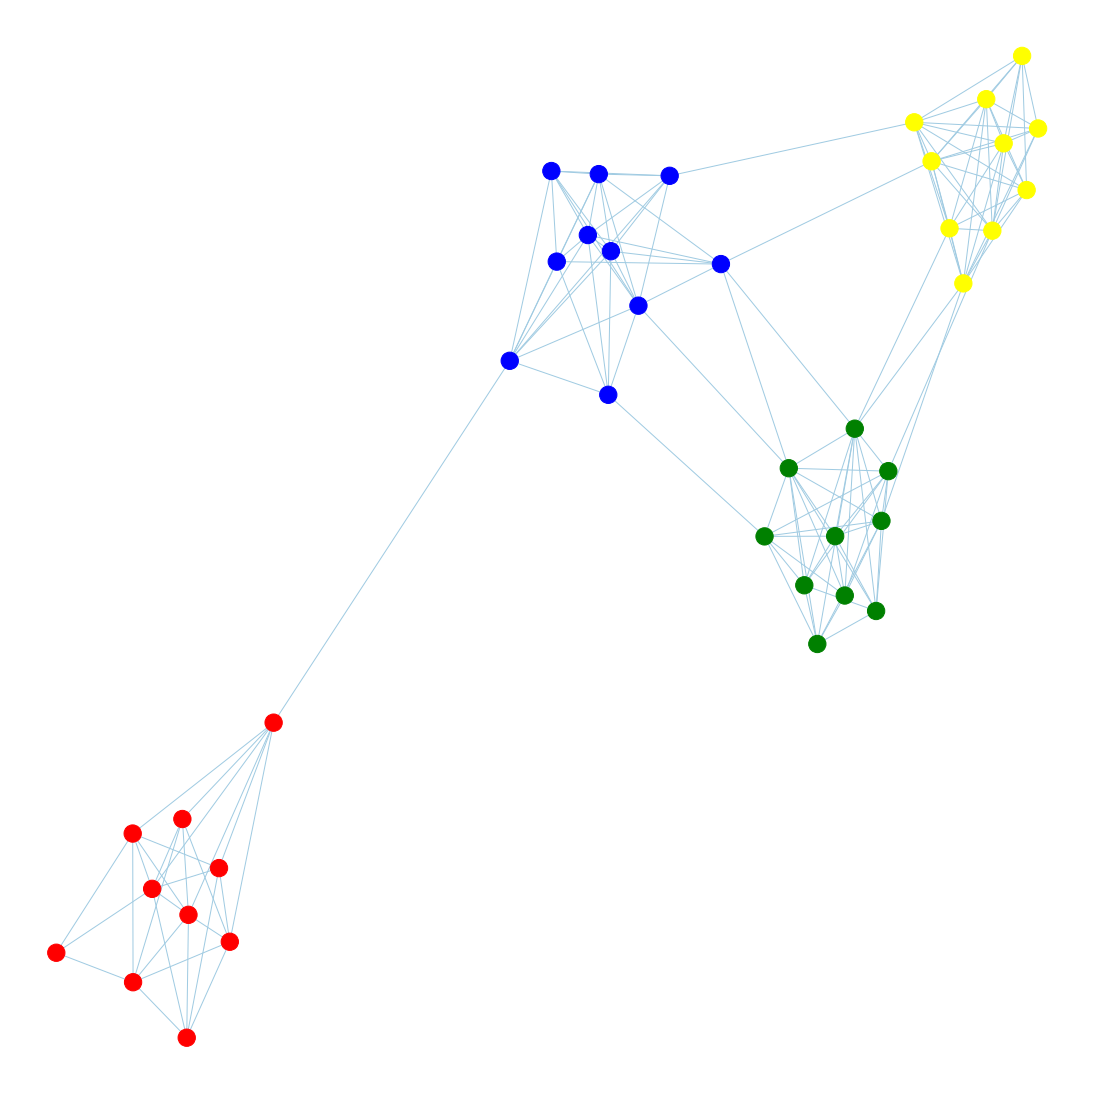

In [85]:
p = []
p1 = [0.8, 0.02, 0.03, 0.04]
p2 = [0.02, 0.6, 0.01, 0.005]
p3 = [0.03, 0.01, 0.75, 0.045]
p4 = [0.04, 0.005, 0.045, 0.9]
p.append(p1)
p.append(p2)
p.append(p3)
p.append(p4)

G = gen_graph(p)
mcl = MCL(nx.to_numpy_array(G), 4, 4)
clusters = mcl.compute()
show(G, clusters)


### Test GoT

0.5166716575622559  sek


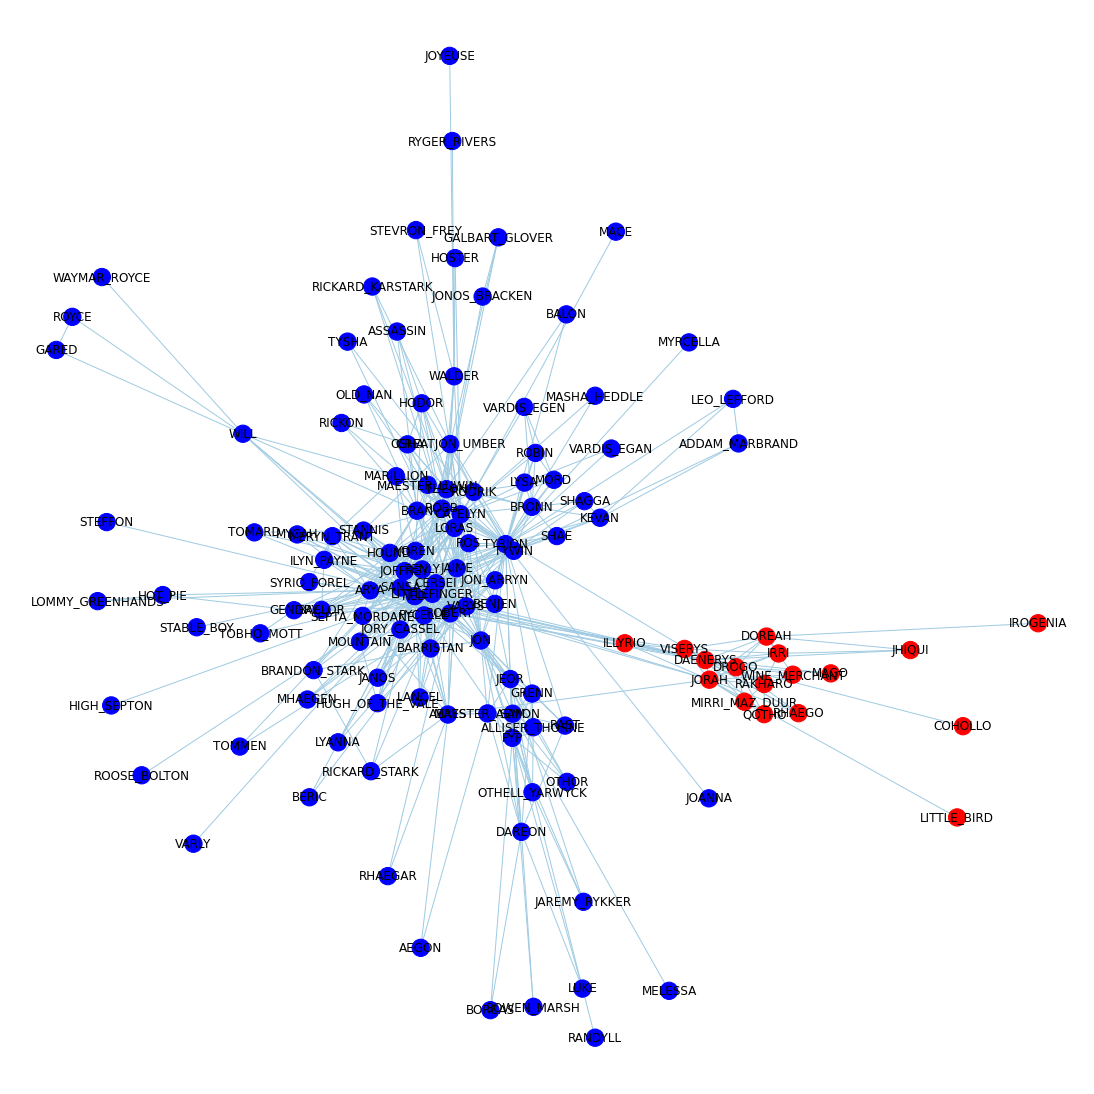

In [86]:
with open("got-s1-edges.csv", 'r') as f:
    next(f, None)
    G = nx.parse_edgelist(f, comments='t', delimiter=',', create_using=nx.Graph(), nodetype=str, data=(('weight', int), ('season', int)))

mcl = MCL(nx.to_numpy_array(G), 4, 4)
clusters = mcl.compute()
show(G, clusters, True)